In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
mass = 131 #unit in g/mol

#Lennard-Jones potential and force calculation
def ljforce(ri, rj, e = 1.77, sig = 0.410):

    #Distance between two particle
    r_norm = np.linalg.norm(ri-rj)

    #LJ potential  and analytical derivative calculation
    potential = 4*e*((sig/r_norm)**12-(sig/r_norm)**6)
    ljDer = ( 4 * e * (-12 * (sig) ** 12 * (1 / r_norm) ** 13 + 6 * (sig) ** 6 * (1 / r_norm) ** 7))

    #Force calculation (in unit of KJ/(mol*nm))
    force1 = -ljDer * (ri-rj)/r_norm
    force2 = -force1

    return potential, force1, force2

#Generating a cube in n dimentional 
rmin = 0.46021 #unit in nm
def make_cube(n):
    coord = []
    for i in range (n):
        for j in range (n):
            for k in range (n):
                coord.append([i,j,k])
    cube = np.array(coord) * rmin
    return cube

#Forces calculation on each atom in the cube
def CubeForces(coord):
    PE = 0 
    forceMatrix = np.zeros((len(coord),3)) #ForceMatrix that can contain the forces later 

    #Force calculation
    for i in range (coord.shape[0]):
        for j in range (coord.shape[0]):
            if i < j:
                potential, forceI, forceJ = ljforce(coord[i], coord[j])
                forceMatrix[i] = forceMatrix[i] + forceI
                forceMatrix[j] = forceMatrix[j] + forceJ
                PE += potential
    return PE, forceMatrix

#calculate the kinetic energy
def compute_kinetic_energy(v_curr):
    KE = 0.0
    for i in range (v_curr.shape[0]):
        KE += 0.5*mass * np.sum(v_curr[i]**2)
    return KE

In [74]:
#4b
def dV (force, dt):
    dV = (force / mass)*dt 
    return dV

#4c
def dX(force, dt, v):
    dX = v*dt + 0.5*force*dt**2/mass 
    return dX

#4d
def MD (coord, n_steps, dt):
    x_traj = []
    v_traj = []
    pe_traj = []
    ke_traj = []
    x_init = make_cube(coord) 
    v_init = np.zeros_like(x_init)
    x_curr = x_init.copy()
    v_curr = v_init.copy()
    using_velocity_verlet = True 
    for step in range (n_steps):
        x_traj.append(x_curr)
        v_traj.append(v_curr)
        if step == 0 or not using_velocity_verlet:
            potential, forces = CubeForces(x_curr)
        x_next = x_curr + dX(forces, dt, v_curr)
        kinetic = compute_kinetic_energy(v_curr) 
        pe_traj.append(potential)
        ke_traj.append(kinetic)
        if using_velocity_verlet:
            potential_new, forces_new = CubeForces(x_curr)
            v_next = v_curr + dV(forces_new, dt)
            forces = forces_new.copy()
            potential = potential_new
        else:    
            v_next = v_curr + dV(forces, dt)
        x_curr = x_next.copy()
        v_curr = v_next.copy()
    x_traj = np.array(x_traj)
    v_traj = np.array(v_traj)
    pe_traj = np.array(pe_traj)
    ke_traj = np.array(ke_traj)
    return x_traj, pe_traj, ke_traj

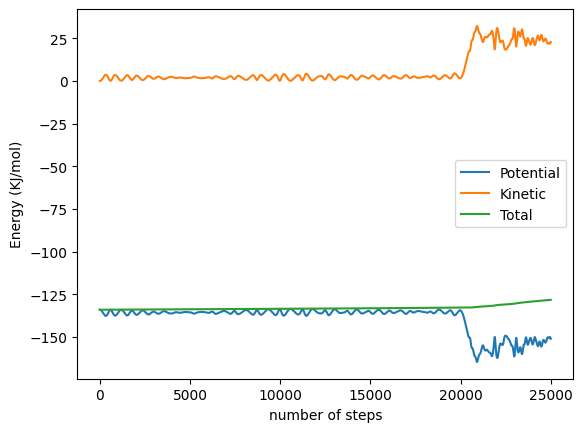

In [73]:
#4e and 4f
x_traj, pe_traj, ke_traj = MD(3, 25000, 0.002)

with open('trajectory_4e.xyz', 'w') as f:
    for frame in range(x_traj.shape[0]):
        if frame%50 != 0: continue
        print("%i" % x_traj.shape[1], file=f)
        print("Frame %i" % frame, file=f)
        for atom in range(x_traj.shape[1]):
            print("H % 12.6f % 12.6f % 12.6f" % (x_traj[frame][atom][0]*10,x_traj[frame][atom][1]*10,x_traj[frame][atom][2]*10), file=f)

fig, ax = plt.subplots()
ax.plot(pe_traj, label='Potential')
ax.plot(ke_traj, label='Kinetic')
ax.plot(pe_traj+ke_traj, label='Total')
ax.set_xlabel("number of steps")
ax.set_ylabel("Energy (KJ/mol)")

ax.legend()

In xyz file, the atoms was moving while maintaining their symmetry. However, after several steps, they begin to move chaotically. 

The total energy maintain constant at begining, but start to increase after around 20000 steps. 

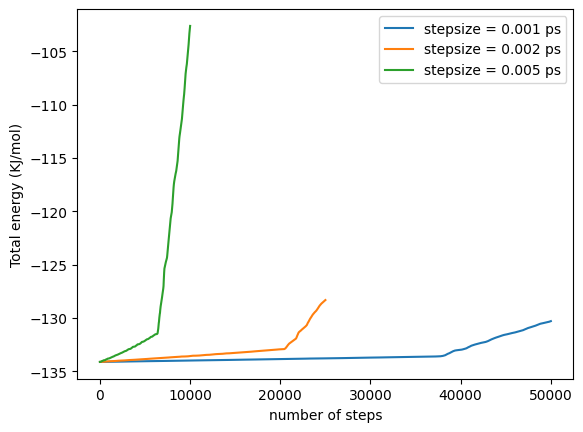

In [67]:
x_traj_1, pe_traj_1, ke_traj_1 = MD(3, 50000, 0.001)
x_traj_2, pe_traj_2, ke_traj_2 = MD(3, 25000, 0.002)
x_traj_3, pe_traj_3, ke_traj_3 = MD(3, 10000, 0.005)

fig, ax = plt.subplots()
ax.plot(pe_traj_1+ke_traj_1, label='stepsize = 0.001 ps')
ax.plot(pe_traj_2+ke_traj_2, label='stepsize = 0.002 ps')
ax.plot(pe_traj_3+ke_traj_3, label='stepsize = 0.005 ps')
ax.set_xlabel("number of steps")
ax.set_ylabel("Total energy (KJ/mol)")
ax.legend()

In [69]:
#4g
x_traj, pe_traj, ke_traj = MD(3, 25000, 0.002)

with open('trajectory_4g.xyz', 'w') as f:
    for frame in range(x_traj.shape[0]):
        if frame%50 != 0: continue
        print("%i" % x_traj.shape[1], file=f)
        print("Frame %i" % frame, file=f)
        for atom in range(x_traj.shape[1]):
            print("H % 12.6f % 12.6f % 12.6f" % (x_traj[frame][atom][0]*10,x_traj[frame][atom][1]*10,x_traj[frame][atom][2]*10), file=f)

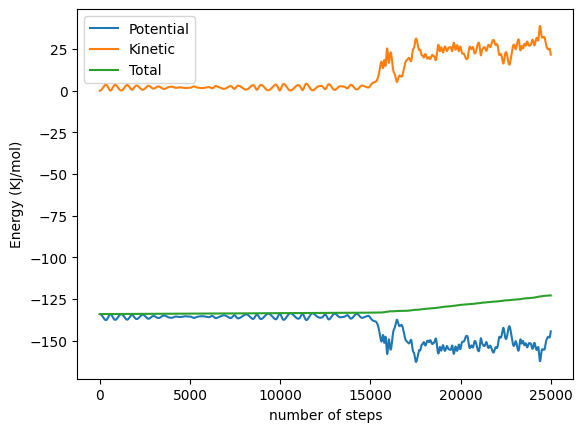

In [75]:

x_traj, pe_traj, ke_traj = MD(3, 25000, 0.002)
fig, ax = plt.subplots()
ax.plot(pe_traj, label='Potential')
ax.plot(ke_traj, label='Kinetic')
ax.plot(pe_traj+ke_traj, label='Total')
ax.set_xlabel("number of steps")
ax.set_ylabel("Energy (KJ/mol)")
ax.legend()